# Model Testing and Predictions on Smaller images

# VGG19 trained on AOI


# 1. Set up

In [1]:
 from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [27]:
!pip install visualkeras

     |████████████████████████████████| 795 kB 7.1 MB/s 


In [28]:
import visualkeras

In [29]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10849049679373930072
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 16154099712
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 8047878298085963833
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
 xla_global_id: 416903419]

In [6]:
!pip install tensorflow-addons --quiet

     |████████████████████████████████| 1.1 MB 8.5 MB/s 


In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras import Model
import tensorflow_addons as tfa
import os
import tempfile


from keras.utils.vis_utils import plot_model

In [31]:
def build_cnn_model():
  model = keras.models.Sequential()

  model.add(
      Conv2D(
          input_shape=(224,224,3),
          filters=64,
          kernel_size=(3,3),
          padding="same", 
          activation="relu"))
  
  model.add(
      Conv2D(
          filters=64,
          kernel_size=(3,3),
          padding="same", 
          activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(
      Conv2D(
          filters=128, 
          kernel_size=(3,3), 
          padding="same", 
          activation="relu"))
  model.add(
      Conv2D(
          filters=128, 
          kernel_size=(3,3), 
          padding="same", 
          activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(
      Conv2D(
          filters=256, 
          kernel_size=(3,3), 
          padding="same", 
          activation="relu"))
  model.add(
      Conv2D(
          filters=256, 
          kernel_size=(3,3), 
          padding="same", 
          activation="relu"))
  model.add(
      Conv2D(
          filters=256, 
          kernel_size=(3,3), 
          padding="same", 
          activation="relu"))
  model.add(
      Conv2D(
          filters=256, 
          kernel_size=(3,3), 
          padding="same", 
          activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(
      Conv2D(
          filters=512, 
          kernel_size=(3,3), 
          padding="same", 
          activation="relu"))
  model.add(
      Conv2D(filters=512, 
             kernel_size=(3,3), 
             padding="same", 
             activation="relu"))
  model.add(
      Conv2D(
          filters=512, 
          kernel_size=(3,3), 
          padding="same", 
          activation="relu"))
  model.add(
      Conv2D(
          filters=512, 
          kernel_size=(3,3), 
          padding="same", 
          activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(
      Conv2D(
          filters=512, 
          kernel_size=(3,3), 
          padding="same", 
          activation="relu"))
  model.add(
      Conv2D(
          filters=512, 
          kernel_size=(3,3), 
          padding="same", 
          activation="relu"))
  model.add(
      Conv2D(
          filters=512, 
          kernel_size=(3,3), 
          padding="same", 
          activation="relu"))
  model.add(
      Conv2D(
          filters=512, 
          kernel_size=(3,3), 
          padding="same", 
          activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(GlobalAveragePooling2D())
  model.add(Flatten())
  model.add(Dense(1024,activation="relu"))
  model.add(Dropout(0.5000000000000001))
  model.add(Dense(1, activation="sigmoid"))

  return model

In [32]:
model = build_cnn_model()

In [33]:
visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

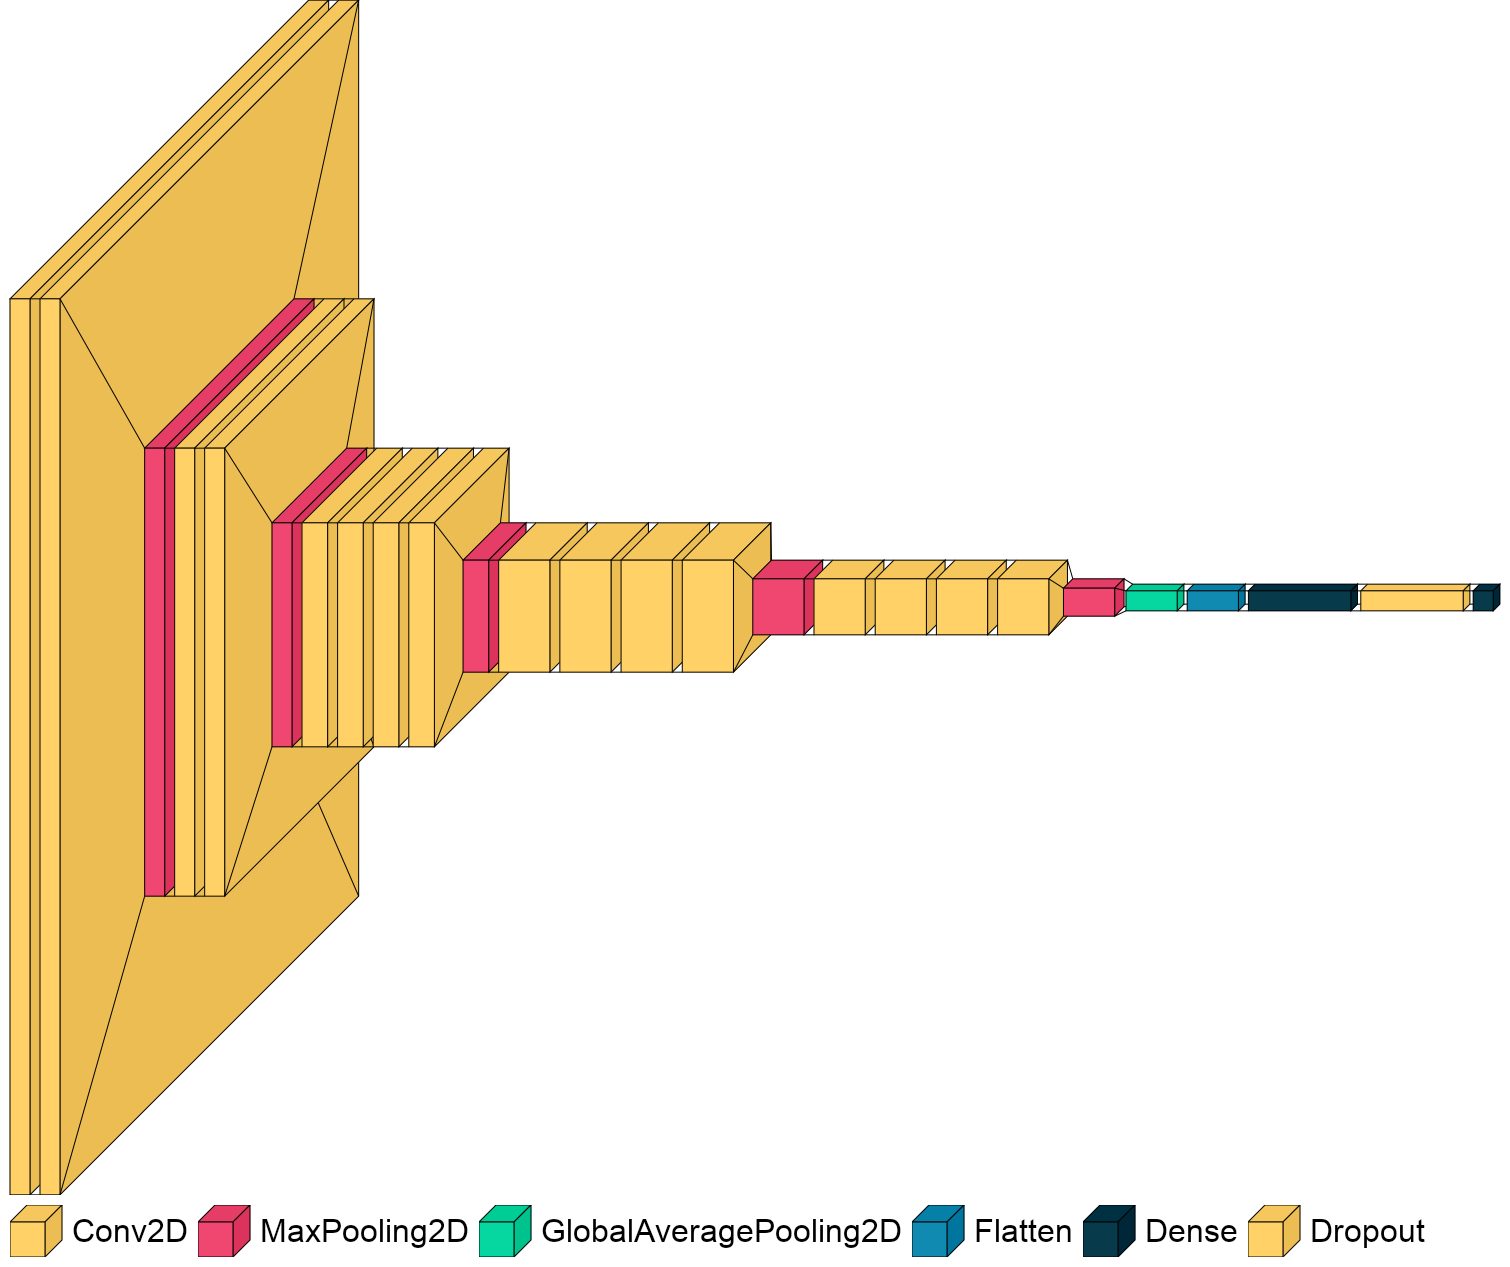

In [35]:
from PIL import ImageFont

font = ImageFont.truetype("arial.ttf", 32)  # using comic sans is strictly prohibited!
visualkeras.layered_view(model, legend=True, font=font, to_file='output.png')